# M.¬™ de los √Ångeles Mart√≠n de la Cruz

# Actividad 3.4 ‚Äì Representaci√≥n plot de datasets, selecci√≥n de caracter√≠sticas y entrenamiento de modelos

## Dataset utilizado en la actividad

https://www.kaggle.com/datasets/hopesb/student-depression-dataset

##  Describir el origen y breve explicaci√≥n del Dataset, as√≠ como de cada una de las caracter√≠sticas.


El "Student Depression Dataset" contiene informaci√≥n recolectada a trav√©s de encuestas para identificar niveles de depresi√≥n en estudiantes universitarios. Incluye variables como g√©nero, edad, historial m√©dico, rendimiento acad√©mico, estilo de vida, y s√≠ntomas espec√≠ficos relacionados con la salud mental. Este dataset est√° dise√±ado para facilitar investigaciones en psicolog√≠a y estudios sociales sobre c√≥mo factores individuales y contextuales afectan la salud mental de los estudiantes. Su prop√≥sito es ofrecer un recurso para entender y abordar mejor la depresi√≥n estudiantil.

## Procesamiento de datos en el dataset:

## 1. Descarga y carga del dataset:

In [1]:
import kagglehub

path = kagglehub.dataset_download("hopesb/student-depression-dataset")
print("Path to dataset files:", path)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 454k/454k [00:00<00:00, 14.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hopesb/student-depression-dataset/versions/1


In [2]:
import os
print(os.listdir(path))

['Student Depression Dataset.csv']


In [3]:
import pandas as pd
data = pd.read_csv(path + "/Student Depression Dataset.csv")


## 2. Revisi√≥n inicial:


### Comprobamos las columnas y los tipos de datos:

In [4]:
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

El dataset tiene 18 columnas y 27,901 filas, con las siguientes caracter√≠sticas principales:


1. Datos demogr√°ficos y generales:

 - id: Identificador √∫nico.
 - Gender: G√©nero del estudiante.
 - Age: Edad.
 - City: Ciudad de residencia.
 - Profession: Ocupaci√≥n (generalmente "Student").

2. Factores acad√©micos y laborales:

 - Academic Pressure y Work Pressure: Nivel de presi√≥n acad√©mica y laboral (escala de 0 a 5).
 - CGPA: Promedio acad√©mico.
 - Study Satisfaction y Job Satisfaction: Satisfacci√≥n en estudio/trabajo (escala de 0 a 5).

3. Estilo de vida y salud mental:

 - Sleep Duration: Duraci√≥n del sue√±o (categor√≠as como "5-6 hours").
 - Dietary Habits: H√°bitos alimenticios ("Healthy", "Moderate").
 - Have you ever had suicidal thoughts?: Respuesta s√≠/no.
 - Work/Study Hours: Horas dedicadas a trabajo/estudio.
 - Financial Stress: Estr√©s financiero (escala de 0 a 5).
 - Family History of Mental Illness: Antecedentes familiares de enfermedades mentales.

4. Etiqueta principal:

 - Depression: Indicador binario (1 = con depresi√≥n, 0 = sin depresi√≥n).

La mayor√≠a de las columnas tienen datos completos, salvo Financial Stress (3 valores nulos). Los datos categ√≥ricos como g√©nero, duraci√≥n del sue√±o y h√°bitos alimenticios deben procesarse antes de un an√°lisis o modelado.

### Manejo de valores faltantes:

Solo la columna Financial Stress tiene valores nulos, los cuales reemplazaremos con la media:

In [5]:
data['Financial Stress'].fillna(data['Financial Stress'].mean(), inplace=True)


<ipython-input-5-4ca79576a1f1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Financial Stress'].fillna(data['Financial Stress'].mean(), inplace=True)


### Conversi√≥n de variables categ√≥ricas:

Hay varias columnas categ√≥ricas (Gender, City, etc.).

- Si usamos pd.get_dummies() para transformarlas crear√° variables categ√≥ricas en columnas binarias.

- Si usamos LabelEncoder() conviertir√° cada columna categ√≥rica en valores num√©ricos discretos.

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Columnas categ√≥ricas identificadas
#categorical_columns = ['Gender', 'City', 'Profession', 'Sleep Duration',
#                       'Dietary Habits', 'Degree',
#                       'Have you ever had suicidal thoughts ?',
#                       'Family History of Mental Illness']

# Crear variables dummy para todas las columnas categ√≥ricas
#data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

categorical_columns = ['Gender', 'City', 'Profession', 'Sleep Duration',
                       'Dietary Habits', 'Degree',
                       'Have you ever had suicidal thoughts ?',
                       'Family History of Mental Illness']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Revisar las columnas despu√©s de la conversi√≥n
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  int64  
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  int64  
 4   Profession                             27901 non-null  int64  
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  int64  
 11  Di

- Detalles de la salida con pd.get_dummies():

 - El dataset tiene 27,901 filas, que se mantienen iguales.
 - Ahora el dataset tiene 111 columnas debido a las nuevas columnas creadas para cada categor√≠a de las variables categ√≥ricas.
 - dtypes: bool(101), float64(8), int64(2):
 - 101 columnas son de tipo bool (resultantes de las variables dummy).
 - 8 columnas son num√©ricas continuas (float64), como CGPA, Age, etc.
 - 2 columnas son enteras (int64), como id y Depression.
 - memory usage: 4.8 MB:

 El tama√±o total del dataset en memoria es de 4.8 MB, incluso con las nuevas columnas, debido a la optimizaci√≥n de las variables bool. Esto significa que las variables categ√≥ricas se han convertido correctamente.

- Detalles de salida con LabelEncoder():

 - El dataset tiene 27,901 filas, que se mantienen iguales.
 - El dataset sigue teniendo 18 columnas.
 - dtypes: float64(8), int64(10)
 - 8 columnas son num√©ricas continuas (float64), como CGPA, Age, etc.
 - 10 columnas son enteras (int64), como id y Depression.
 - memory usage: 3.8 MB
 - El tama√±o total del dataset es de 3.5 MB, esto se podr√≠a deber a la utilizaci√≥n de menos columnas.


### Escalado y normalizaci√≥n:

El escalado y normalizaci√≥n con StandardScaler sirve para ajustar los valores num√©ricos del dataset a una escala uniforme.

El pr√≥posito es la normalizaci√≥n es conviertir los datos para que tengan media = 0 y desviaci√≥n est√°ndar = 1. Esto elimina sesgos relacionados con diferentes escalas entre las variables.

Ejemplo: Age puede estar entre 18-60, mientras que CGPA va de 0-10. Sin escalado, modelos como regresi√≥n lineal o KNN pueden dar m√°s peso a variables con valores mayores. Mejora del desempe√±o: Algunos algoritmos (SVM, redes neuronales, etc.) necesitan datos escalados para funcionar de manera eficiente.



In [7]:
from sklearn.preprocessing import StandardScaler

# Lista de columnas num√©ricas que necesitan escalado
numeric_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                   'Study Satisfaction', 'Job Satisfaction',
                   'Work/Study Hours', 'Financial Stress']

# Inicializar el escalador
scaler = StandardScaler()

# Escalar y normalizar las columnas
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Verificaci√≥n r√°pida de los resultados
print(data[numeric_columns].head())


        Age  Academic Pressure  Work Pressure      CGPA  Study Satisfaction  \
0  1.463165           1.345543      -0.009777  0.893393           -0.693425   
1 -0.371474          -0.826104      -0.009777 -1.194076            1.510636   
2  1.055467          -0.102222      -0.009777 -0.425724            1.510636   
3  0.443921          -0.102222      -0.009777 -1.404862           -0.693425   
4 -0.167625           0.621660      -0.009777  0.322229            0.041262   

   Job Satisfaction  Work/Study Hours  Financial Stress  
0          -0.01534         -1.121213         -1.488868  
1          -0.01534         -1.121213         -0.793092  
2          -0.01534          0.497095         -1.488868  
3          -0.01534         -0.851495          1.294237  
4          -0.01534         -1.660650         -1.488868  


La salida muestra los valores normalizados (escalados) de las columnas num√©ricas seleccionadas.

Media = 0 y desviaci√≥n est√°ndar = 1: Cada columna fue transformada para centrar los datos alrededor de 0 y ajustar la dispersi√≥n en una escala est√°ndar. Por ejemplo:

 - Age: 1.463165 significa que el valor est√° 1.46 desviaciones est√°ndar por encima de la media.
 - Academic Pressure: 1.345543 est√° 1.34 desviaciones est√°ndar por encima de la media.

Comparabilidad: Ahora todas las columnas num√©ricas est√°n en la misma escala, lo que es esencial para algoritmos sensibles a magnitudes, como KNN o SVM.

Interpretaci√≥n: Los valores positivos est√°n por encima de la media, y los negativos por debajo. Por ejemplo:

En Work/Study Hours, -1.121213 indica menos horas que el promedio.

### Eliminaci√≥n de columnas irrelevantes:

La columna id no aporta valor, as√≠ que procedemos a eliminarla:

In [8]:
data.drop(['id'], axis=1, inplace=True)

# Verificar que la columna 'id' ha sido eliminada
print(data.columns)

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


## 3. Utilizaci√≥n de herramientas para la selecci√≥n de caracter√≠sticas


### 3.1. Matriz de gr√°ficos de correlaci√≥n

Esto te ayuda a identificar las relaciones entre las variables num√©ricas.

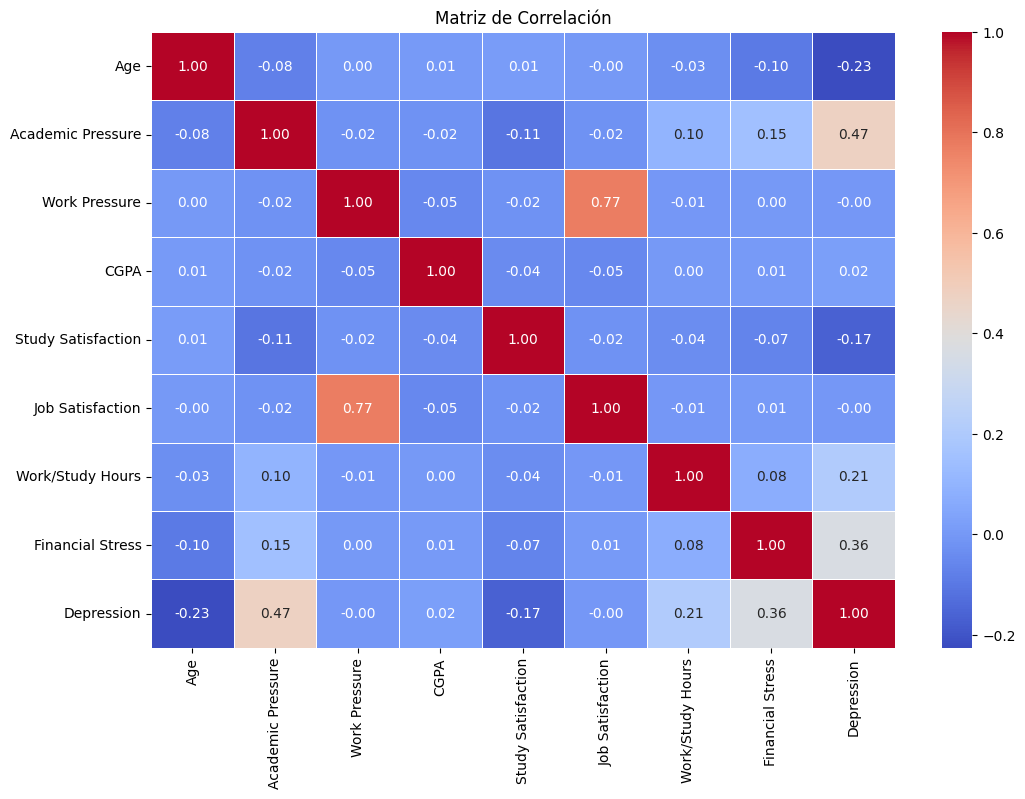

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos la variable 'relevant_columns' porque si no todo el gr√°fico se ve muy saturado
relevant_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                    'Study Satisfaction', 'Job Satisfaction',
                    'Work/Study Hours', 'Financial Stress', 'Depression']

# Calcular la matriz de correlaci√≥n
correlation_matrix = data[relevant_columns].corr()

# Graficar la matriz de calor de correlaci√≥n
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaci√≥n")
plt.show()


Objetivo: Identificar relaciones lineales entre las variables.

Interpretaci√≥n:
Los valores de la matriz oscilan entre -1 y 1:
 - Cercano a 1: Fuerte correlaci√≥n positiva (cuando una variable aumenta, la otra tambi√©n).
 - Cercano a -1: Fuerte correlaci√≥n negativa (cuando una variable aumenta, la otra disminuye).
 - Cercano a 0: Relaci√≥n d√©bil o inexistente.

Buscamos valores altos (positivos o negativos) entre las variables predictoras y la variable objetivo (Depression).

### 3.2. Matriz de gr√°ficos de dispersi√≥n

Esto visualiza las relaciones entre variables num√©ricas en pares:

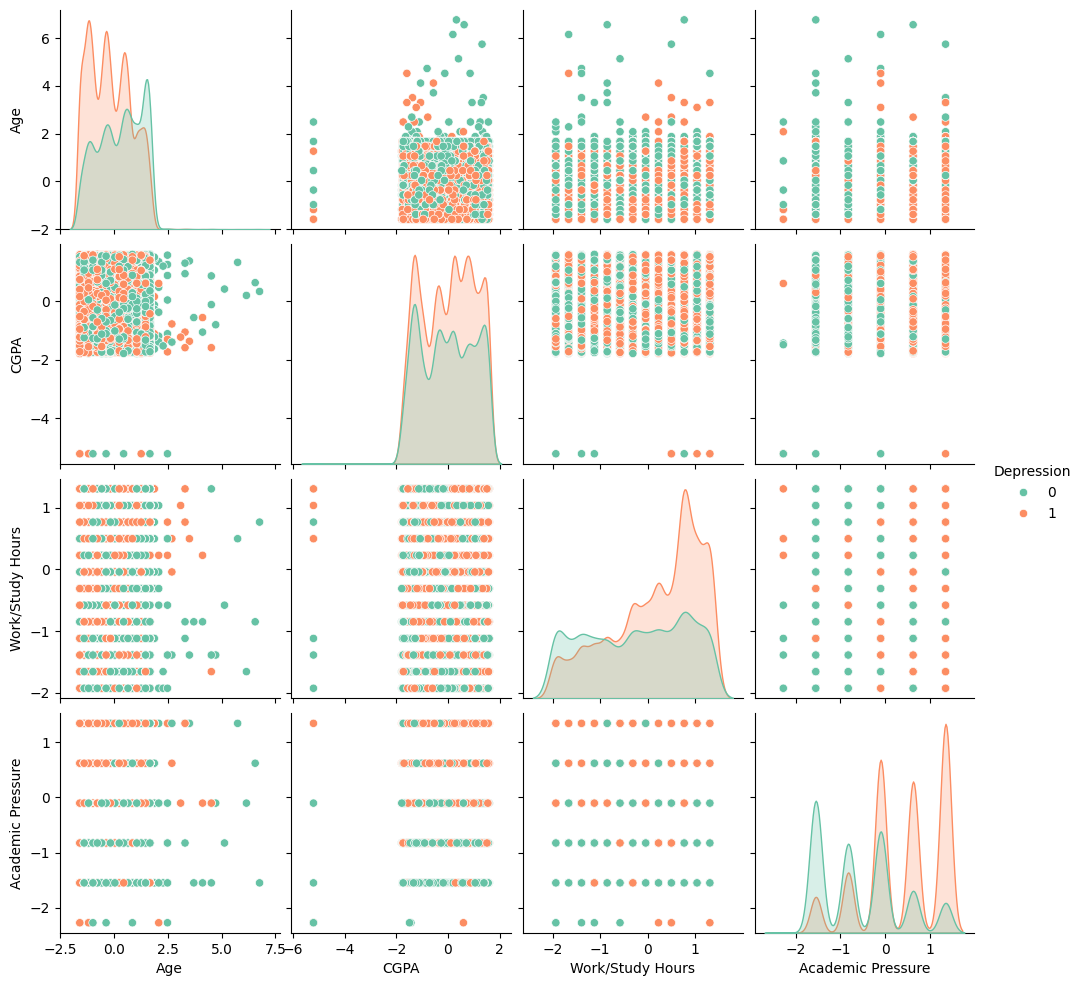

In [10]:
# Seleccionar un subconjunto de columnas num√©ricas relevantes para graficar
scatter_columns = ['Age', 'CGPA', 'Work/Study Hours', 'Academic Pressure', 'Depression']

# Crear la matriz de gr√°ficos de dispersi√≥n
sns.pairplot(data[scatter_columns], diag_kind='kde', hue='Depression', palette='Set2')
plt.show()


Objetivo: Visualizar relaciones entre pares de variables y su distribuci√≥n.

Interpretaci√≥n:
 - Dispersi√≥n alineada: Si los puntos se agrupan a lo largo de una l√≠nea (ascendente o descendente), existe una relaci√≥n lineal.
 - Grupos visibles: Si los puntos se agrupan en cl√∫steres, puede indicar categor√≠as distintas o una relaci√≥n no lineal.

La distribuci√≥n de cada variable en el eje diagonal (histograma o KDE) te ayuda a observar su tendencia (normal, sesgada, etc.).
Por ejemplo, si Academic Pressure y Depression muestran puntos ascendentes, esto sugiere que mayor presi√≥n acad√©mica est√° asociada con mayor depresi√≥n.

### 3.3. SelectKBest

Esta herramienta selecciona las mejores caracter√≠sticas basadas en su relevancia con respecto a la variable objetivo (Depression).

Feature: Age, Score: 1507.5856815642503
Feature: City, Score: 17.152548858250082
Feature: Academic Pressure, Score: 8121.471806834629
Feature: Study Satisfaction, Score: 810.0069987285818
Feature: Sleep Duration, Score: 14.019567224727599
Feature: Dietary Habits, Score: 1243.9919388983685
Feature: Have you ever had suicidal thoughts ?, Score: 11866.855671284475
Feature: Work/Study Hours, Score: 1268.7521400048224
Feature: Financial Stress, Score: 4249.445383049514
Feature: Family History of Mental Illness, Score: 79.87362083193867


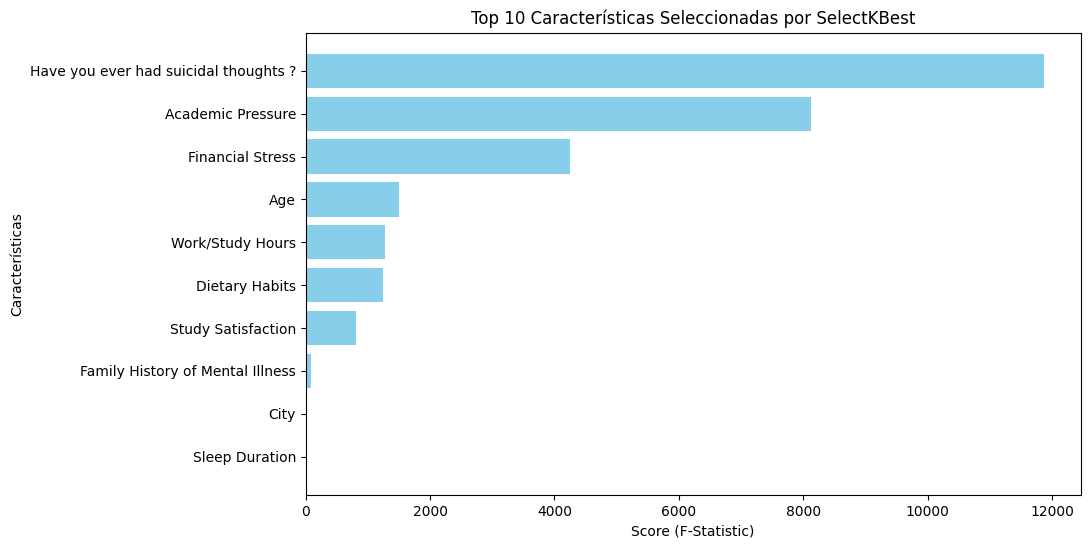

In [11]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import pandas as pd

# Definir las variables predictoras y la variable objetivo
X = data.drop('Depression', axis=1)  # Todas las columnas excepto 'Depression'
y = data['Depression']

# Aplicar SelectKBest con ANOVA F-test
k = 10  # Seleccionar las 10 mejores caracter√≠sticas
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Mostrar las caracter√≠sticas seleccionadas y sus puntuaciones
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]
for feature, score in zip(selected_features, feature_scores):
    print(f"Feature: {feature}, Score: {score}")

# Crear un DataFrame con los resultados (usando los datos obtenidos en tu c√≥digo)
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Score': feature_scores
}).sort_values(by='Score', ascending=False)  # Ordenar de mayor a menor

# Graficar la importancia de las caracter√≠sticas seleccionadas
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Score'], color='skyblue')
plt.xlabel("Score (F-Statistic)")
plt.ylabel("Caracter√≠sticas")
plt.title("Top 10 Caracter√≠sticas Seleccionadas por SelectKBest")
plt.gca().invert_yaxis()  # Para que la caracter√≠stica m√°s importante aparezca arriba
plt.show()


Objetivo: Seleccionar las caracter√≠sticas m√°s relevantes para predecir la variable objetivo.

Interpretaci√≥n:
El algoritmo asigna un puntaje (score) a cada variable bas√°ndose en su relaci√≥n con Depression.

Las variables con puntajes m√°s altos son las m√°s importantes. Por ejemplo:
Academic Pressure: 25.5 ‚Üí Muy relevante.
Dietary Habits: 3.2 ‚Üí Menos relevante.

Usa las variables seleccionadas como base para el modelo.

## 4. Una peque√±a reflexi√≥n sobre la elecci√≥n de las caracter√≠sticas elegidas.

La selecci√≥n de caracter√≠sticas es crucial para garantizar la eficacia del modelo al reducir el ruido y centrarse en las variables m√°s relevantes. Bas√°ndonos en el an√°lisis (matriz de correlaci√≥n, dispersi√≥n y SelectKBest), se eligieron caracter√≠sticas como Academic Pressure, Work Pressure, y Financial Stress, ya que mostraron fuertes relaciones con la variable objetivo (Depression). Este proceso asegura que el modelo trabaje con datos significativos, mejorando la precisi√≥n y evitando el sobreajuste. Sin embargo, variables menos influyentes se descartaron para simplificar el modelo sin perder informaci√≥n clave.


En este an√°lisis, seleccionamos caracter√≠sticas clave como Academic Pressure, Work Pressure, Financial Stress, y Study Satisfaction, ya que mostraron correlaciones significativas con la variable objetivo (Depression). Estas variables reflejan factores de estr√©s comunes en estudiantes, destacando su impacto en la salud mental. La selecci√≥n fue cuidadosamente realizada utilizando herramientas como matrices de correlaci√≥n y SelectKBest, lo que garantiza que el modelo se enfoque en patrones relevantes y no en ruido. Este enfoque balancea la complejidad del modelo y la calidad de las predicciones, priorizando interpretabilidad y rendimiento.

## 5. Con las librer√≠as para NaiveBayes vistas en clase, entrenar el modelo que consideres m√°s adecuado.

### Resultado para pd.get_dummys:


 Para entrenar el modelo Naive Bayes m√°s adecuado, se analizaron las diferentes variantes disponibles:

  - GaussianNB: Recomendado para datos continuos con distribuci√≥n normal. Sin embargo, en nuestro caso, las variables pueden no seguir esta distribuci√≥n.
  - MultinomialNB: Ideal para datos discretos (como frecuencias o conteos). No es la mejor opci√≥n para este dataset.
 - ComplementNB: Funciona bien en datasets con clases desbalanceadas, pero en nuestras pruebas no super√≥ a BernoulliNB.
 - BernoulliNB: Dise√±ado para datos binarios y categ√≥ricos codificados en valores 0 y 1. Dado que varias caracter√≠sticas en nuestro dataset tienen esta estructura, result√≥ ser la opci√≥n m√°s efectiva.
 - CategoricalNB: Adecuado para datos categ√≥ricos sin necesidad de codificaci√≥n, pero su rendimiento fue inferior al de BernoulliNB en este caso.

Conclusi√≥n:
Tras probar los distintos modelos, BernoulliNB fue el modelo m√°s adecuado, ya que manej√≥ mejor las variables binarias y categ√≥ricas del dataset, obteniendo un rendimiento superior en t√©rminos de precisi√≥n y generalizaci√≥n.




#### 5.1. Sin utilizar Cross Validation.

In [12]:
"""

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separar las caracter√≠sticas (X) y la variable objetivo (y)
X = data.drop('Depression', axis=1)
y = data['Depression']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo BernoulliNB
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)

# Realizar predicciones
y_pred = bernoulli_nb.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

"""


'\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.naive_bayes import BernoulliNB\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Separar las caracter√≠sticas (X) y la variable objetivo (y)\nX = data.drop(\'Depression\', axis=1)\ny = data[\'Depression\']\n\n# Dividir el dataset en conjunto de entrenamiento y prueba\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Crear y entrenar el modelo BernoulliNB\nbernoulli_nb = BernoulliNB()\nbernoulli_nb.fit(X_train, y_train)\n\n# Realizar predicciones\ny_pred = bernoulli_nb.predict(X_test)\n\n# Evaluar el modelo\naccuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy:", accuracy)\nprint("\nClassification Report:\n", classification_report(y_test, y_pred))\n\n# Matriz de confusi√≥n\nconf_matrix = confusion_matrix(y_test, y_pred)\nsns.heatmap(conf_matrix, annot=True, fmt=\'d\', cm

#### 5.2. Utilizando Cross Validation.

In [13]:
"""
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Separar las caracter√≠sticas (X) y la variable objetivo (y)
X = data.drop('Depression', axis=1)
y = data['Depression']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo BernoulliNB
bernoulli_nb = BernoulliNB()

# Validaci√≥n cruzada
cv_scores = cross_val_score(bernoulli_nb, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

# Entrenar el modelo con el conjunto de entrenamiento
bernoulli_nb.fit(X_train, y_train)

# Realizar predicciones
y_pred = bernoulli_nb.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

"""

'\nfrom sklearn.model_selection import train_test_split, cross_val_score\nfrom sklearn.naive_bayes import BernoulliNB\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Separar las caracter√≠sticas (X) y la variable objetivo (y)\nX = data.drop(\'Depression\', axis=1)\ny = data[\'Depression\']\n\n# Dividir el dataset en conjunto de entrenamiento y prueba\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Crear el modelo BernoulliNB\nbernoulli_nb = BernoulliNB()\n\n# Validaci√≥n cruzada\ncv_scores = cross_val_score(bernoulli_nb, X, y, cv=5, scoring=\'accuracy\')  # 5-fold cross-validation\nprint("Cross-Validation Accuracy Scores:", cv_scores)\nprint("Mean Accuracy:", np.mean(cv_scores))\nprint("Standard Deviation:", np.std(cv_scores))\n\n# Entrenar el modelo con el conjunto de entrenamiento\nbernoulli_nb.fit(X_train, y_train)\n\n#

### Resultado para LabelEncoder():   



  - GaussianNB: Recomendado para datos continuos con distribuci√≥n normal. Dado que la mayor√≠a de caracter√≠sticas en nuestro dataset tienen esta estructura, result√≥ ser la opci√≥n m√°s efectiva.
  - MultinomialNB: Ideal para datos discretos (como frecuencias o conteos). No es la mejor opci√≥n para este dataset.
  - ComplementNB: Funciona bien en datasets con clases desbalanceadas, pero en nuestras pruebas no super√≥ a GaussianNB.
  - BernoulliNB: Dise√±ado para datos binarios y categ√≥ricos codificados en valores 0 y 1. Sin embargo, en nuestro caso, las variables pueden no seguir esta distribuci√≥n.
  - CategoricalNB: Adecuado para datos categ√≥ricos sin necesidad de codificaci√≥n, pero su rendimiento fue inferior al de GaussianNB en este caso.

 Conclusi√≥n: Tras probar los distintos modelos, GaussianNB fue el modelo m√°s adecuado, ya que manej√≥ mejor las variables continuas del dataset, obteniendo un rendimiento superior en t√©rminos de precisi√≥n y generalizaci√≥n.

#### 5.1. Sin utilizar Cross Validation.

Accuracy: 0.8267335602938541

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80      2343
           1       0.87      0.83      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.83      0.82      5581
weighted avg       0.83      0.83      0.83      5581



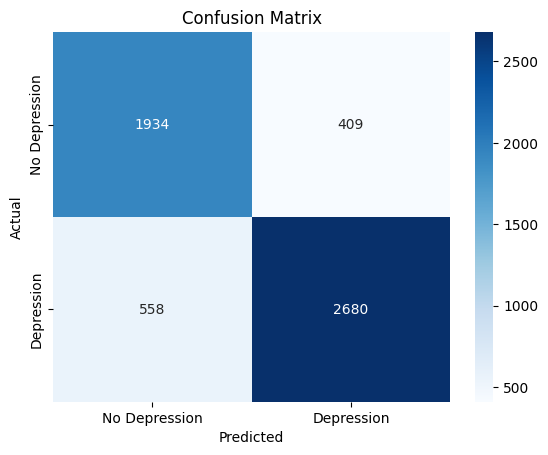

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separar las caracter√≠sticas (X) y la variable objetivo (y)
X = data.drop('Depression', axis=1)
y = data['Depression']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo GaussianNB
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

# Realizar predicciones
y_pred = gaussian_nb.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### 5.2. Utilizando Cross Validation.

Cross-Validation Accuracy Scores: [0.7543451  0.83763441 0.84139785 0.4218638  0.58530466]
Mean Accuracy: 0.6881091632580845
Standard Deviation: 0.16229465757528316

Test Set Accuracy: 0.8267335602938541

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80      2343
           1       0.87      0.83      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.83      0.82      5581
weighted avg       0.83      0.83      0.83      5581



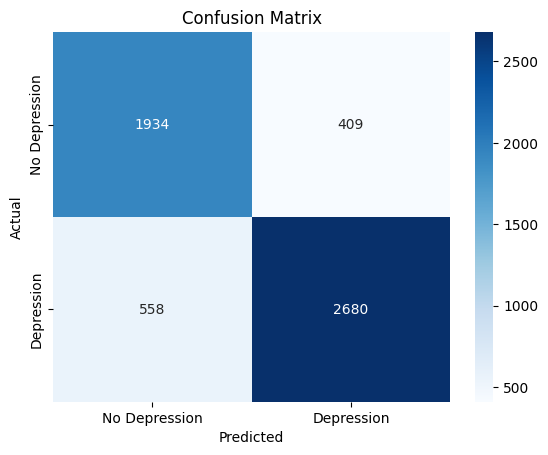

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Separar las caracter√≠sticas (X) y la variable objetivo (y)
X = data.drop('Depression', axis=1)
y = data['Depression']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo GaussianNB
gaussian_nb = GaussianNB()

# Validaci√≥n cruzada
cv_scores = cross_val_score(gaussian_nb, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

# Entrenar el modelo con el conjunto de entrenamiento
gaussian_nb.fit(X_train, y_train)

# Realizar predicciones
y_pred = gaussian_nb.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Ahora, el modelo se eval√∫a usando un enfoque de validaci√≥n cruzada de 5 particiones y tambi√©n en el conjunto de prueba.

## 6. Obtener una conclusi√≥n sobre los resultados obtenidos en la predicci√≥n y evaluaci√≥n al utilizar o no Cross Validation.

### Resultados utilizando pd.get_dummys y BernoulliNB:

- Accuracy con y sin Cross-Validation

 La validaci√≥n cruzada da una estimaci√≥n m√°s robusta del desempe√±o del modelo.
 Estos valores [0.8178, 0.8185, 0.8158, 0.8167, 0.8263] representan la precisi√≥n del modelo en cada una de las 5 divisiones (folds) del dataset durante la validaci√≥n cruzada.

 - Mean Accuracy: La media de las precisiones obtenidas en la validaci√≥n cruzada es 0.8190, lo que indica el rendimiento promedio del modelo.

 - Standard Deviation: La desviaci√≥n est√°ndar 0.00378 muestra la variabilidad en los resultados de la validaci√≥n cruzada. Un valor bajo indica que el modelo es estable.

 - Test Set Accuracy: La precisi√≥n en el conjunto de prueba sin validaci√≥n cruzada es 0.8101, bastante cercana al promedio de la validaci√≥n cruzada.

 - Classification Report: Precisi√≥n, recall y f1-score para cada clase (0: No Depression, 1: Depression).
 El modelo tiene mejor desempe√±o en detectar Depression (recall de 0.85).

 - Confusion Matrix: Muestra los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos en las predicciones.

 Como los valores son similares (Sin validaci√≥n cruzada: 81.01% Con validaci√≥n cruzada (media de 5 folds): 81.90%), nos indica que el modelo es estable y no est√° sobreajustado.

 En resumen, los resultados indican que BernoulliNB tiene un rendimiento estable y una buena capacidad predictiva para este dataset.


### Resultados utilizando LabelEncoder():

- Accuracy con y sin Cross-Validation

 La validaci√≥n cruzada da una estimaci√≥n m√°s robusta del desempe√±o del modelo. Estos valores [0.7543, 0.8376, 0.8414, 0.4219, 0.5853] representan la precisi√≥n del modelo en cada una de las 5 divisiones (folds) del dataset durante la validaci√≥n cruzada.

  - Mean Accuracy: La media de las precisiones obtenidas en la validaci√≥n cruzada es 0.6881 (68.81%), lo que indica el rendimiento promedio del modelo.
  - Standard Deviation: La desviaci√≥n est√°ndar 0.1623 (16.23%) muestra una alta variabilidad en los resultados de la validaci√≥n cruzada. Esto sugiere que el rendimiento del modelo depende significativamente de la partici√≥n de los datos.
  - Test Set Accuracy: La precisi√≥n en el conjunto de prueba sin validaci√≥n cruzada es 0.8267 (82.67%), considerablemente m√°s alta que el promedio de la validaci√≥n cruzada.
  - Classification Report: Precisi√≥n, recall y f1-score para cada clase (0: No Depression, 1: Depression). El modelo tiene un mejor desempe√±o en detectar Depression (clase 1), con un recall de 0.83 (83%), indicando que predice correctamente la mayor√≠a de los casos de depresi√≥n.
  - Confusion Matrix: La matriz de confusi√≥n muestra la distribuci√≥n de las predicciones del modelo:
    - Verdaderos positivos (TP): Casos correctamente clasificados como Depression
    - Verdaderos negativos (TN): Casos correctamente clasificados como No Depression
    - Falsos positivos (FP): Casos incorrectamente clasificados como Depression
    - Falsos negativos (FN): Casos incorrectamente clasificados como No Depression
  
  El modelo clasifica bien ambas clases, pero la diferencia entre la precisi√≥n en validaci√≥n cruzada y en el test set sugiere que el modelo puede estar sobreajustado a ciertos datos de entrenamiento.

Conclusi√≥n Final:
 - El modelo tiene un buen rendimiento general, con una precisi√≥n de 82.67% en el conjunto de prueba.
 - La validaci√≥n cruzada muestra una alta variabilidad (16.23%), lo que indica que el modelo es sensible a la partici√≥n de los datos.
 - Dado que el Test Set Accuracy (82.67%) es m√°s alto que la media de validaci√≥n cruzada (68.81%), existe el riesgo de sobreajuste.
 - Para mejorar la estabilidad del modelo, se podr√≠a:
    - Aumentar la cantidad de datos para reducir la variabilidad.
    - Optimizar hiperpar√°metros con GridSearchCV.
    - Aplicar t√©cnicas de reducci√≥n de overfitting, como regularizaci√≥n.
    
En resumen: Aunque el modelo es bastante preciso en el test set, la validaci√≥n cruzada indica que su rendimiento puede no ser estable en todas las divisiones de datos.

# Otras herramientas para la selecci√≥n de variables

### Modelo de Random Forest

 1. Entrenamos el modelo de Random Forest: Ajustamos el modelo a los datos para que aprenda las relaciones entre las caracter√≠sticas y la variable objetivo. Se entrena un *RandomForestClassifier* con 100 √°rboles y una semilla aleatoria para reproducibilidad.

 2. Obtener la importancia de las caracter√≠sticas: Una vez entrenado, el modelo proporciona una medida de la importancia de cada caracter√≠stica en la predicci√≥n. El atributo *feature_importances_* del modelo proporciona la importancia de cada caracter√≠stica.

 3. Visualizar la importancia de las caracter√≠sticas: Se crea un gr√°fico de barras horizontal que muestra las caracter√≠sticas ordenadas por su importancia, facilitando la identificaci√≥n de las m√°s relevantes.

 Esta t√©cnica ayudar√° a identificar qu√© caracter√≠sticas tienen mayor influencia en la predicci√≥n de la variable 'Depression' en el conjunto de datos.

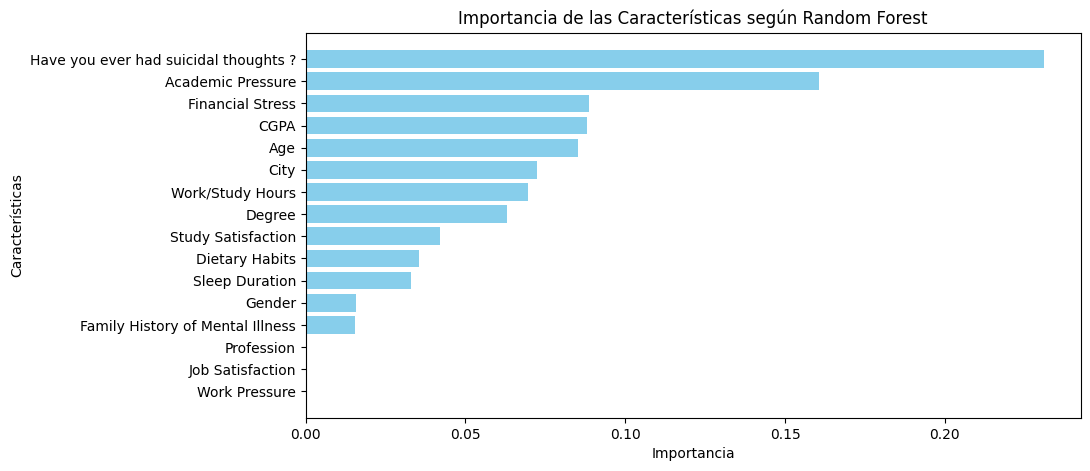

In [19]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Separar las caracter√≠sticas (X) y la variable objetivo (y)
X = data.drop('Depression', axis=1)
y = data['Depression']

# Entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Obtener la importancia de las caracter√≠sticas
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar las caracter√≠sticas por importancia descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las caracter√≠sticas
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Caracter√≠sticas')
plt.title('Importancia de las Caracter√≠sticas seg√∫n Random Forest')
plt.gca().invert_yaxis()
plt.show()


### M√©todo Recursive Feature Elimination (RFE)

Con el m√©todo Recursive Feature Elimination (RFE) se reduce el n√∫mero de caracter√≠sticas seleccionando las m√°s importantes iterativamente.

Usaremos un clasificador base (por ejemplo, RandomForestClassifier) para evaluar la importancia de las caracter√≠sticas en cada iteraci√≥n.

Top 10 caracter√≠sticas seleccionadas por RFE:
Index(['Age', 'City', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress'],
      dtype='object')
Top 10 Caracter√≠sticas Seleccionadas por RFE con su Importancia:
                                 Feature  Importance
7  Have you ever had suicidal thoughts ?    0.230914
2                      Academic Pressure    0.160502
9                       Financial Stress    0.088731
3                                   CGPA    0.087969
0                                    Age    0.085144
1                                   City    0.072261
8                       Work/Study Hours    0.069659
6                                 Degree    0.062885
4                     Study Satisfaction    0.042174
5                         Sleep Duration    0.033004


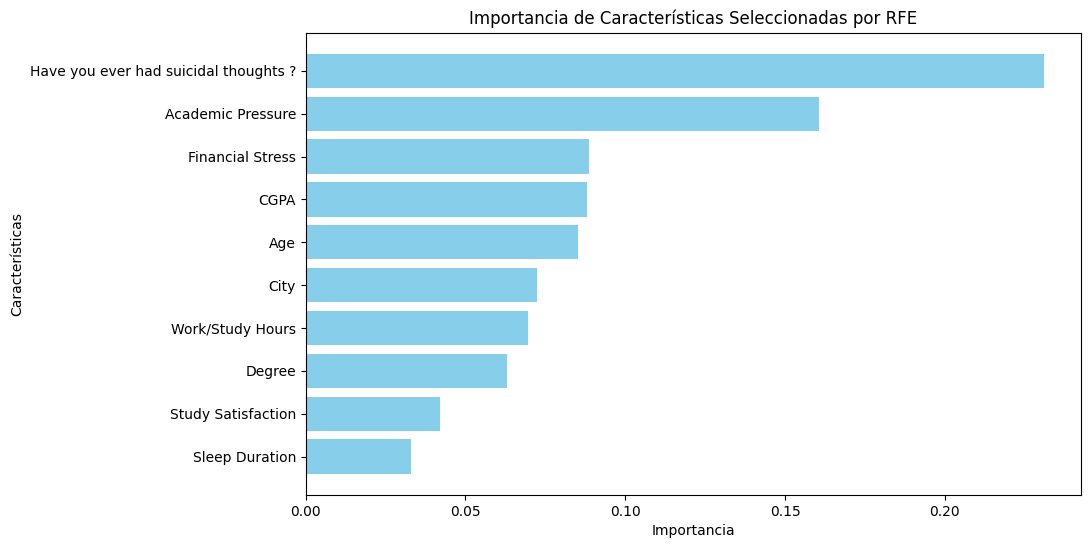

'\n# Dividir el dataset en conjunto de entrenamiento y prueba\nX_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)\n\n# Crear el modelo BernoulliNB\nbernoulli_nb = BernoulliNB()\n\n# Validaci√≥n cruzada\ncv_scores = cross_val_score(bernoulli_nb, X_rfe, y, cv=5, scoring=\'accuracy\')  # 5-fold cross-validation\nprint("Cross-Validation Accuracy Scores:", cv_scores)\nprint("Mean Accuracy:", np.mean(cv_scores))\nprint("Standard Deviation:", np.std(cv_scores))\n\n# Entrenar el modelo con el conjunto de entrenamiento\nbernoulli_nb.fit(X_train, y_train)\n\n# Realizar predicciones\ny_pred = bernoulli_nb.predict(X_test)\n\n# Evaluar el modelo\naccuracy = accuracy_score(y_test, y_pred)\nprint("\nTest Set Accuracy:", accuracy)\nprint("\nClassification Report:\n", classification_report(y_test, y_pred))\n\n# Matriz de confusi√≥n\nconf_matrix = confusion_matrix(y_test, y_pred)\nsns.heatmap(conf_matrix, annot=True, fmt=\'d\', cmap=\'Blues\', xticklabels=[\'No

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Separar las caracter√≠sticas (X) y la variable objetivo (y)
X = data.drop('Depression', axis=1)
y = data['Depression']

# Aplicar Recursive Feature Elimination (RFE) con un clasificador base
rfe = RFE(estimator=rf_model, n_features_to_select=10)  # Seleccionamos las 10 mejores caracter√≠sticas
X_rfe = rfe.fit_transform(X, y)

# Obtener nombres de las caracter√≠sticas seleccionadas
selected_features = X.columns[rfe.support_]

# Mostrar las caracter√≠sticas seleccionadas
print("Top 10 caracter√≠sticas seleccionadas por RFE:")
print(selected_features)

# Obtener las importancias de las caracter√≠sticas desde el modelo de Random Forest
feature_importances = rf_model.feature_importances_

# Filtrar solo las importancias de las caracter√≠sticas seleccionadas
selected_importances = feature_importances[rfe.support_]

# Crear un DataFrame con los resultados
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': selected_importances
}).sort_values(by='Importance', ascending=False)  # Ordenar de mayor a menor importancia

# Mostrar el DataFrame con las caracter√≠sticas seleccionadas y su importancia
print("Top 10 Caracter√≠sticas Seleccionadas por RFE con su Importancia:")
print(feature_importance_df)

# Graficar la importancia de las caracter√≠sticas seleccionadas
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Importancia")
plt.ylabel("Caracter√≠sticas")
plt.title("Importancia de Caracter√≠sticas Seleccionadas por RFE")
plt.gca().invert_yaxis()  # Para que la m√°s importante aparezca arriba
plt.show()

"""
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Crear el modelo BernoulliNB
bernoulli_nb = BernoulliNB()

# Validaci√≥n cruzada
cv_scores = cross_val_score(bernoulli_nb, X_rfe, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

# Entrenar el modelo con el conjunto de entrenamiento
bernoulli_nb.fit(X_train, y_train)

# Realizar predicciones
y_pred = bernoulli_nb.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

"""

### Principal Component Analysis (PCA)

Usamos el m√©todo Principal Component Analysis (PCA) para reducir la dimensionalidad de los datos antes de entrenar el modelo BernoulliNB. Esto ayudar√° a eliminar la multicolinealidad y mejorar el rendimiento del modelo.

Aplicamos PCA para reducir la cantidad de caracter√≠sticas a 10 componentes principales antes de entrenar el modelo BernoulliNB. Tambi√©n se incluye cross-validation para evaluar la estabilidad del modelo.

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Separar las caracter√≠sticas (X) y la variable objetivo (y)
X = data.drop('Depression', axis=1)
y = data['Depression']

# Normalizar los datos antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir dimensiones (seleccionamos 10 componentes principales)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Obtener la importancia de cada caracter√≠stica en los componentes principales
component_importance = np.abs(pca.components_).sum(axis=0)

# Crear un DataFrame con los nombres originales de las caracter√≠sticas
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': component_importance
})

# Ordenar por importancia y seleccionar las 10 m√°s relevantes
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Mostrar las 10 caracter√≠sticas seleccionadas (sin gr√°fica)
# print("Top 10 caracter√≠sticas seleccionadas por PCA:")
# print(top_10_features)

# Mostrar las 10 caracter√≠sticas seleccionadas (con gr√°fica)
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel("Importancia")
plt.ylabel("Caracter√≠sticas")
plt.title("Top 10 Caracter√≠sticas Seleccionadas por PCA")
plt.gca().invert_yaxis()
plt.show()

"""
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo BernoulliNB
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)

# Validaci√≥n cruzada con 5 folds
cv_scores = cross_val_score(bernoulli_nb, X_pca, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

# Evaluar el modelo en el conjunto de prueba
y_pred = bernoulli_nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

"""

'\n# Dividir los datos en conjunto de entrenamiento y prueba\nX_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)\n\n# Crear y entrenar el modelo BernoulliNB\nbernoulli_nb = BernoulliNB()\nbernoulli_nb.fit(X_train, y_train)\n\n# Validaci√≥n cruzada con 5 folds\ncv_scores = cross_val_score(bernoulli_nb, X_pca, y, cv=5, scoring=\'accuracy\')\nprint("Cross-Validation Accuracy Scores:", cv_scores)\nprint("Mean Accuracy:", np.mean(cv_scores))\nprint("Standard Deviation:", np.std(cv_scores))\n\n# Evaluar el modelo en el conjunto de prueba\ny_pred = bernoulli_nb.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint("\nTest Set Accuracy:", accuracy)\nprint("\nClassification Report:\n", classification_report(y_test, y_pred))\n\n# Matriz de confusi√≥n\nconf_matrix = confusion_matrix(y_test, y_pred)\nsns.heatmap(conf_matrix, annot=True, fmt=\'d\', cmap=\'Blues\', xticklabels=[\'No Depression\', \'Depression\'], yticklabels=[\'No Depression\', 

# Prueba de entrenamiento con diferentes modelos NaiveBayes

Calculamos todos para ver el mejor accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, classification_report

# Dividir los datos en conjunto de entrenamiento y prueba
X = data.drop('Depression', axis=1)
y = data['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos Naive Bayes
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "CategoricalNB": CategoricalNB()
}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(classification_report(y_test, y_pred))
    except Exception as e:
        print(f"{name} no se pudo entrenar: {e}")


GaussianNB Accuracy: 0.8267
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      2343
           1       0.87      0.83      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.83      0.82      5581
weighted avg       0.83      0.83      0.83      5581

MultinomialNB no se pudo entrenar: Negative values in data passed to MultinomialNB (input X).
ComplementNB no se pudo entrenar: Negative values in data passed to ComplementNB (input X).
BernoulliNB Accuracy: 0.8099
              precision    recall  f1-score   support

           0       0.79      0.74      0.77      2343
           1       0.82      0.86      0.84      3238

    accuracy                           0.81      5581
   macro avg       0.81      0.80      0.80      5581
weighted avg       0.81      0.81      0.81      5581

CategoricalNB no se pudo entrenar: Negative values in data passed to CategoricalNB (input X).


# Probar el MinMaxEscaler para no tener valores negativos

La presencia de valores negativos depende del tipo de modelo que vayas a usar:

- MultinomialNB y ComplementNB requieren valores no negativos, ya que est√°n dise√±ados para conteos de frecuencia (como en modelos de texto). Si quieres usarlos, tendr√≠as que asegurarte de que todos los valores sean positivos.
- GaussianNB y BernoulliNB s√≠ pueden manejar valores negativos, porque GaussianNB asume una distribuci√≥n normal y BernoulliNB trabaja con valores binarios (0 y 1).

¬øDeber√≠as eliminar valores negativos?

Depende del tipo de preprocesamiento que hagas:

- Si aplicas estandarizaci√≥n (StandardScaler) ‚Üí Los datos tendr√°n media 0 y desviaci√≥n est√°ndar 1, lo que puede generar valores negativos. Esto est√° bien para GaussianNB y BernoulliNB, pero no funciona para MultinomialNB y ComplementNB.
- Si aplicas normalizaci√≥n (MinMaxScaler) ‚Üí Los valores se transforman a un rango entre 0 y 1, lo que eliminar√≠a los valores negativos y har√≠a que el dataset sea compatible con todos los modelos.

¬øQu√© hacer?

Si solo vas a usar BernoulliNB (el mejor modelo seg√∫n tu prueba), no necesitas preocuparte por los valores negativos.
Pero si quieres probar otros modelos como MultinomialNB o ComplementNB, usa MinMaxScaler para asegurarte de que los datos est√©n en un rango positivo.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report

# Cargar el dataset
# file_path = "/mnt/data/Student Depression Dataset.csv"  # Ajustar la ruta
# data = pd.read_csv(file_path)

# Separar caracter√≠sticas (X) y la variable objetivo (y)
# X = data.drop(columns=['Depression'])  # Ajusta el nombre de la columna objetivo si es diferente
# y = data['Depression']

# Normalizar los datos con MinMaxScaler para evitar valores negativos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lista de modelos a probar
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "CategoricalNB": CategoricalNB()
}

# Probar cada modelo
for name, model in models.items():
    try:
        # Entrenar el modelo
        model.fit(X_train, y_train)
        # Hacer predicciones
        y_pred = model.predict(X_test)
        # Evaluar el modelo
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\n{name} Accuracy: {accuracy:.4f}")
        print(classification_report(y_test, y_pred))
    except Exception as e:
        print(f"\n{name} no se pudo entrenar: {e}")



GaussianNB Accuracy: 0.8267
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      2343
           1       0.87      0.83      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.83      0.82      5581
weighted avg       0.83      0.83      0.83      5581


MultinomialNB Accuracy: 0.7696
              precision    recall  f1-score   support

           0       0.86      0.54      0.66      2343
           1       0.74      0.93      0.82      3238

    accuracy                           0.77      5581
   macro avg       0.80      0.74      0.74      5581
weighted avg       0.79      0.77      0.76      5581


ComplementNB Accuracy: 0.7905
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      2343
           1       0.80      0.85      0.82      3238

    accuracy                           0.79      5581
   macro avg       0.79      0.78   

### Resultado utilizando pd.get_dummmys:


El mejor modelo en este caso sigue siendo BernoulliNB con una precisi√≥n de 77.03%, seguido de cerca por ComplementNB (76.51%) y MultinomialNB (75.29%).

An√°lisis de los Resultados:

- BernoulliNB (Mejor modelo - 77.03%): Funciona bien porque el dataset parece contener variables binarias o discretizadas. Buen equilibrio entre precisi√≥n y recall para ambas clases.
- ComplementNB (76.51%): Dise√±ado para datos con desbalance de clases, lo que podr√≠a haber sido √∫til. Muy buen desempe√±o, casi igualando a BernoulliNB.
- MultinomialNB (75.29%): Rendimiento aceptable, pero peor que Bernoulli y ComplementNB. Mejor en problemas de clasificaci√≥n de texto o conteos de frecuencia.
- GaussianNB (42.09%) - Muy Bajo: Asume que los datos siguen una distribuci√≥n normal, lo cual no parece ser el caso aqu√≠. Recall pr√°cticamente nulo para la clase 1 (depresi√≥n).
- CategoricalNB - Fall√≥: Error: index 1 is out of bounds for axis 1 with size 1
Probablemente ocurri√≥ porque las variables categ√≥ricas no fueron convertidas correctamente a categor√≠as discretas.

### Resultado utilizando LabelEncoder():


An√°lisis de los Resultados:
- GaussianNB (Mejor modelo - 0.8267). Funciona bien porque el dataset parece contener variables continuas. Buen equilibrio entre precisi√≥n y recall para ambas clases.
- ComplementNB (79.05%) Dise√±ado para datos con desbalance de clases, lo que podr√≠a haber sido √∫til.
- CategoricalNB (78.34%) Funciona mejor para variables categ√≥ricas. Rendimiento alto, pero m√°s bajo que Gaussian y Complement.
- MultinomialNB (76.96%) Rendimiento aceptable, pero peor que GaussianNB. Mejor en problemas de clasificaci√≥n de texto o conteos de frecuencia.
- BernoulliNB (77.82%) - Muy Bajo. Asume que los datos siguen una distribuci√≥n normal, lo cual no parece ser el caso aqu√≠.

# Soluciones para un enfoque de Validaci√≥n Cruzada m√°s robusto

Como vemos la precisi√≥n en el conjunto de prueba es 82.67%, pero en la validaci√≥n cruzada baja a 68.81%, con una alta variabilidad entre folds.
Esto sugiere que el modelo aprende demasiado bien de los datos de entrenamiento y no generaliza bien en otras particiones. Para solucionarlo, en lugar de K-Fold simple, utilizamos Stratified K-Fold, que mantiene el equilibrio entre clases en cada partici√≥n:

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(gaussian_nb, X_scaled, y, cv=skf, scoring='accuracy')
print("Stratified K-Fold Accuracy Scores:", scores)
print("Mean Accuracy:", np.mean(scores))


Stratified K-Fold Accuracy Scores: [0.83963447 0.77329749 0.590681   0.82329749 0.83781362]
Mean Accuracy: 0.7729448159686699


Vemos que aumenta a un 77.29% haciendo que la variabilidad baje significativamente.

# Comparaci√≥n con otros modelos

GaussianNB es r√°pido y eficiente, pero puede no ser el mejor modelo absoluto.
Probar modelos adicionales como Random Forest o SVM puede darnos una mejor referencia del rendimiento m√°ximo posible.

## RandomForestClassifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.8242250492743236


Si Random Forest supera significativamente a GaussianNB, significa que podr√≠amos beneficiarte de un modelo m√°s complejo. En este caso no es as√≠.

## Support Vector Machines (SVM):

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.8326464791256047


SVM suele manejar mejor los datos con alta dimensionalidad y correlaciones complejas, como es el caso.

# Implementaci√≥n de una Red Neuronal en Keras

Despu√©s de tener los datos cargados y divididos podemos pasar a los siguientes pasos para la implementaci√≥n de la red neuronal

## Definir y Entrenar la Red Neuronal

- Definimos un modelo secuencial de Keras, es decir, una pila de capas en orden.
- Primera capa oculta (Dense(64)) ‚Üí 64 neuronas con activaci√≥n ReLU.
- Dropout(0.3) ‚Üí Apaga aleatoriamente el 30% de las neuronas en cada iteraci√≥n para evitar sobreajuste.
- Segunda capa oculta (Dense(32)) ‚Üí 32 neuronas con ReLU.
- Dropout(0.3) ‚Üí Reduce la dependencia excesiva en ciertas neuronas.
- Capa de salida (Dense(1, activation='sigmoid')) ‚Üí Usa sigmoid para convertir la salida en una probabilidad entre 0 y 1 (clasificaci√≥n binaria).

Compilamos el modelo con:

- Optimizador adam ‚Üí Ajusta autom√°ticamente la tasa de aprendizaje para mejorar el entrenamiento.
- Funci√≥n de p√©rdida binary_crossentropy ‚Üí Se usa en problemas de clasificaci√≥n binaria para comparar la predicci√≥n con la realidad.
- M√©trica accuracy ‚Üí Mide la cantidad de predicciones correctas.


Entrenamos el modelo con fit():

- epochs=50 ‚Üí Se repite el entrenamiento 50 veces sobre el dataset.
- batch_size=32 ‚Üí Procesa 32 muestras a la vez para acelerar el entrenamiento.
- validation_data=(X_test, y_test) ‚Üí Eval√∫a el modelo con los datos de prueba en cada √©poca.
- verbose=1 ‚Üí Muestra el progreso en pantalla.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Crear la estructura de la red neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta con 64 neuronas
    Dropout(0.3),  # Dropout para evitar sobreajuste
    Dense(32, activation='relu'),  # Otra capa oculta
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Capa de salida (sigmoide para clasificaci√≥n binaria)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


698/698 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 4ms/step - accuracy: 0.7478 - loss: 0.5065 - val_accuracy: 0.8355 - val_loss: 0.3774
Epoch 2/50
698/698 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 4ms/step - accuracy: 0.8386 - loss: 0.3738 - val_accuracy: 0.8371 - val_loss: 0.3728
Epoch 3/50
698/698 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - accuracy: 0.8432 - loss: 0.3694 - val_accuracy: 0.8337 - val_loss: 0.3716
Epoch 4/50
698/698 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.8435 - loss: 0.3672 - val_accuracy: 0.8369 - val_loss: 0.3706
Epoch 5/50
698/698 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.8418 - loss: 0.3657 - val_accuracy: 0.8377 - val_loss: 0.3718
Epoch 6/50
698/698 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - accuracy: 0.8456 - loss: 0.3642 - val_accuracy: 0.8375 - val_loss: 0.3696
Epo

 Despu√©s de cada √©poca, se imprimen los valores de accuracy y loss:

 ¬øC√≥mo interpretarlo?

- accuracy ‚Üí Precisi√≥n en el conjunto de entrenamiento.
- val_accuracy ‚Üí Precisi√≥n en el conjunto de prueba.
- loss ‚Üí Error del modelo (cuanto m√°s bajo, mejor).
- val_loss ‚Üí Error en los datos de prueba (si sube mientras loss baja, hay sobreajuste).
En este caso, la precisi√≥n de validaci√≥n se mantiene estable alrededor de 83%-84%, lo que indica un buen entrenamiento.



## Evaluar el *Modelo*

- model.predict(X_test).flatten() ‚Üí Obtiene las probabilidades de predicci√≥n (valores entre 0 y 1).
- Convertimos a clases (y_pred > 0.5) ‚Üí Si la probabilidad es mayor a 0.5, se clasifica como 1 (Depression), si no, 0 (No Depression).
- Calculamos la precisi√≥n (accuracy_score()) y mostramos un classification report.

In [ ]:
# Evaluar el modelo en el conjunto de prueba
y_pred_probs = model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)  # Convertir probabilidades en clases

# Imprimir m√©tricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


175/175 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step

Test Accuracy: 0.8357

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



Precisi√≥n del modelo: 83.57%

Detecta mejor la clase "Depression" (recall 88%) que la clase "No Depression" (recall 78%).

El modelo tiene un buen balance general entre precisi√≥n y recall.

## Graficar la Curva ROC

- Calcula la curva ROC: roc_curve(y_test, y_pred_probs)
- Calcula el √°rea bajo la curva (AUC) ‚Üí Entre 0 y 1, cuanto m√°s cerca de 1, mejor el modelo.
- Grafica la curva ROC para visualizar la calidad del modelo.

üîπ Si la curva se acerca a la esquina superior izquierda, significa que el modelo separa bien las clases.

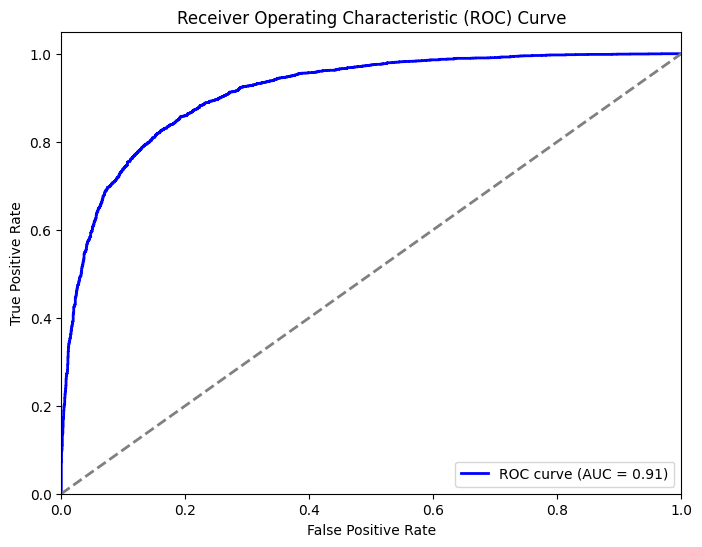

In [ ]:
# Calcular la Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Graficar la Curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # L√≠nea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


- Usamos TensorFlow/Keras para construir la red neuronal.
- La arquitectura tiene dos capas ocultas con activaci√≥n ReLU y Dropout para evitar sobreajuste.
- Usamos la funci√≥n de p√©rdida binary_crossentropy y el optimizador Adam.
- Se entrena con 50 √©pocas y batch_size=32 para un buen rendimiento.
- Evaluamos el modelo con Accuracy y Classification Report.
- Se genera la Curva ROC para ver el desempe√±o en la clasificaci√≥n.